<div class=warn>
<h2>Assessed part of the workshop</h2>
    <i>If you don't know it... Google it!</i>
    
* <b>Step 1 [5%]</b>: Import the "FreeSolv" dataset from [http://moleculenet.ai/datasets-1] (a copy can also be found as "FreeSolv.csv" in the "ES_ML_SOSSO" directory within the Jupyter Notebook environment). <br>
* <b>Step 2 [5%]</b>: Split the dataset, by (randomly!) assigning 70% of the structure to the trainining set and 30% to the test set.<br>
* <b>Step 3 [5%]</b>: Plot the probability density function of the target values for both the training and the test dataset. <br>
* <b>Step 4 [10%]</b>: Choose your descriptors! <br>
* <b>Step 5 [25%]</b>: Fit a Gaussian Process using a [rational quadratic kernel](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RationalQuadratic.html#sklearn.gaussian_process.kernels.RationalQuadratic), setting the initial value of the lengthscale to 1 and the initial value of the hyperparameter $\alpha$ to 0.1 in combination with a white kernel (setting the initial value of the noise level to 1). <br>
* <b>Step 6 [10%]</b>: Visualize the result via a scatter plot (GP prediction vs Exp. Lipophilicity) including training and test sets predictions.<br>
* <b>Step 7 [15%]</b>: Optimize the value of $\alpha$ according to the mean squared error of the predictions for the dataset. Depending on your specific settings, you might see very little variation in your MSE scores with different values of $\alpha$. If that is the case, feel free to explore any other aspect of the algorithm instead. Examples would include: using different kernels ([here is a readily accessible list](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels), but you can create your own as well) and/or exploring the effect of different optimizers. The [GridSearchCV function of scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html) can speed up things greatly (if you master its usage...).<br>
* <b>Step 8 [5%]</b>: Visualize the (hopefully improved with respect to what you have obtained in Step 6) result via a scatter plot (GP prediction vs Exp. Lipophilicity) including training and test sets predictions.<br>   
* <b>Step 9 [10%]</b>: Calculate the mean square error and the Person's correlation coefficient relative to your prediction. Error bars can be added via [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html).
<div/>

In [3]:
# import pandas as pd
# import numpy as np
# import ES_ML_SOSSO.chemfun as cf
# from rdkit import Chem
# from rdkit.Chem import Descriptors
# from rdkit.Chem import rdMolDescriptors
# import sklearn
# from sklearn.gaussian_process import kernels
# from sklearn.model_selection import train_test_split
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
# import random
# import scipy
# from sklearn.gaussian_process.kernels import Product
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import pearsonr
# import math

RDKit WARNING: [16:35:01] Enabling RDKit 2019.09.2 jupyter extensions


In [4]:
# data = pd.read_csv('./FreeSolv.csv')

A seed is chosen to ensure the same splitting of the training and test sets, ergo, same results achieved with every run through of the code.

In [5]:
# train_set, test_set = train_test_split(data, test_size = 0.3, random_state = 2)

In this next cell, I plotted the probability densoty function of the training and test sets

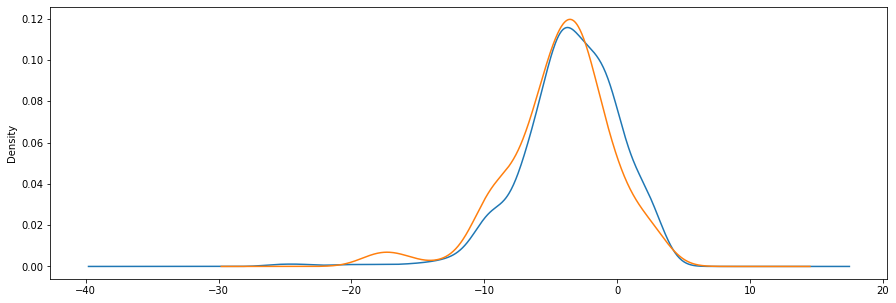

In [6]:
# plt.figure(figsize=(15,5))
# train_set["expt"].plot.kde()
# test_set["expt"].plot.kde()

In [9]:
# MFSTR=cf.SMILES2MOLES(train_set['smiles'])
# MFSTE=cf.SMILES2MOLES(test_set['smiles'])

In [10]:
# # Choosing the descriptors for training (SDTR) and test (SDTE) sets. 

# SDTR=[]
# for m in MFSTR:
#     desc=[]
#     desc.append(Chem.Descriptors.NumHDonors(m)) # hydrogen bond donors
#     desc.append(Chem.Descriptors.NumHAcceptors(m))  # Number of hydrogen bond acceptors
#     desc.append(Chem.Descriptors.NumHeteroatoms(m))   # heteroatoms
#     desc.append(Descriptors.NumAromaticRings(m)) # the number of aromatic rings in the molecule
#     desc.append(Descriptors.NOCount(m)) # teh number of Nitrogens and Oxygens bond count
#     desc.append(Descriptors.MolLogP(m)) # molar octanol-water partition coefficient
#     desc.append(rdMolDescriptors.CalcNumAmideBonds(m)) # the number of amide bonds
#     desc.append(Descriptors.HeavyAtomCount(m)) # the number of heavy atoms
#     desc.append(Descriptors.NHOHCount(m)) # the number of NH or OH's
#     desc.append(Descriptors.fr_Al_OH(m)) # the number of aliphatic hydroxyl groups
#     SDTR.append(desc)

# SDTE=[]
# for m in MFSTE:
#     desc=[]
#     desc.append(Chem.Descriptors.NumHDonors(m)) 
#     desc.append(Chem.Descriptors.NumHAcceptors(m))  
#     desc.append(Chem.Descriptors.NumHeteroatoms(m))   
#     desc.append(Descriptors.NumAromaticRings(m))
#     desc.append(Descriptors.NOCount(m))
#     desc.append(Descriptors.MolLogP(m))
#     desc.append(rdMolDescriptors.CalcNumAmideBonds(m))
#     desc.append(Descriptors.HeavyAtomCount(m))
#     desc.append(Descriptors.NHOHCount(m))
#     desc.append(Descriptors.fr_Al_OH(m))
#     SDTE.append(desc)

The rational quadratic kernel is the kernel we use:

$$
k(x_i, x_j) = (1 + d(x_i, x_j)^2 / (2*\alpha * l^2))^{-\alpha}
$$

where l is length_scale, $\alpha$ is the hyperparameter

In this cell, I set the kernel and fitted the gaussian process regressor. I also cross validated the data, and the array shown gives the negative mean square error, which is quite large, indicating that the fit is not an ideal fit. After this I plotted the initial

In [11]:
# k1 = kernels.RationalQuadratic(length_scale=1.0, alpha=1.0) + kernels.WhiteKernel(1)
# gp = GaussianProcessRegressor(kernel=k1, normalize_y=True, n_restarts_optimizer=10)
# expTR = np.array(train_set['expt'])
# expTE = np.array(test_set['expt'])
# gp.fit(SDTR, expTR)

# TrainPred=gp.predict(SDTR).reshape(-1,1)
# TestPred=gp.predict(SDTE).reshape(-1,1)

# #Cross validation of the entire data before optimisation
# alldesc= SDTR+SDTE
# allsol = np.append(expTE,expTR)

# cross_val_score(gp,alldesc,allsol,cv=5,
#                 scoring = 'neg_mean_squared_error')

array([-13.89785586, -14.68055371, -14.90612145, -18.21498713,
       -12.39839523])

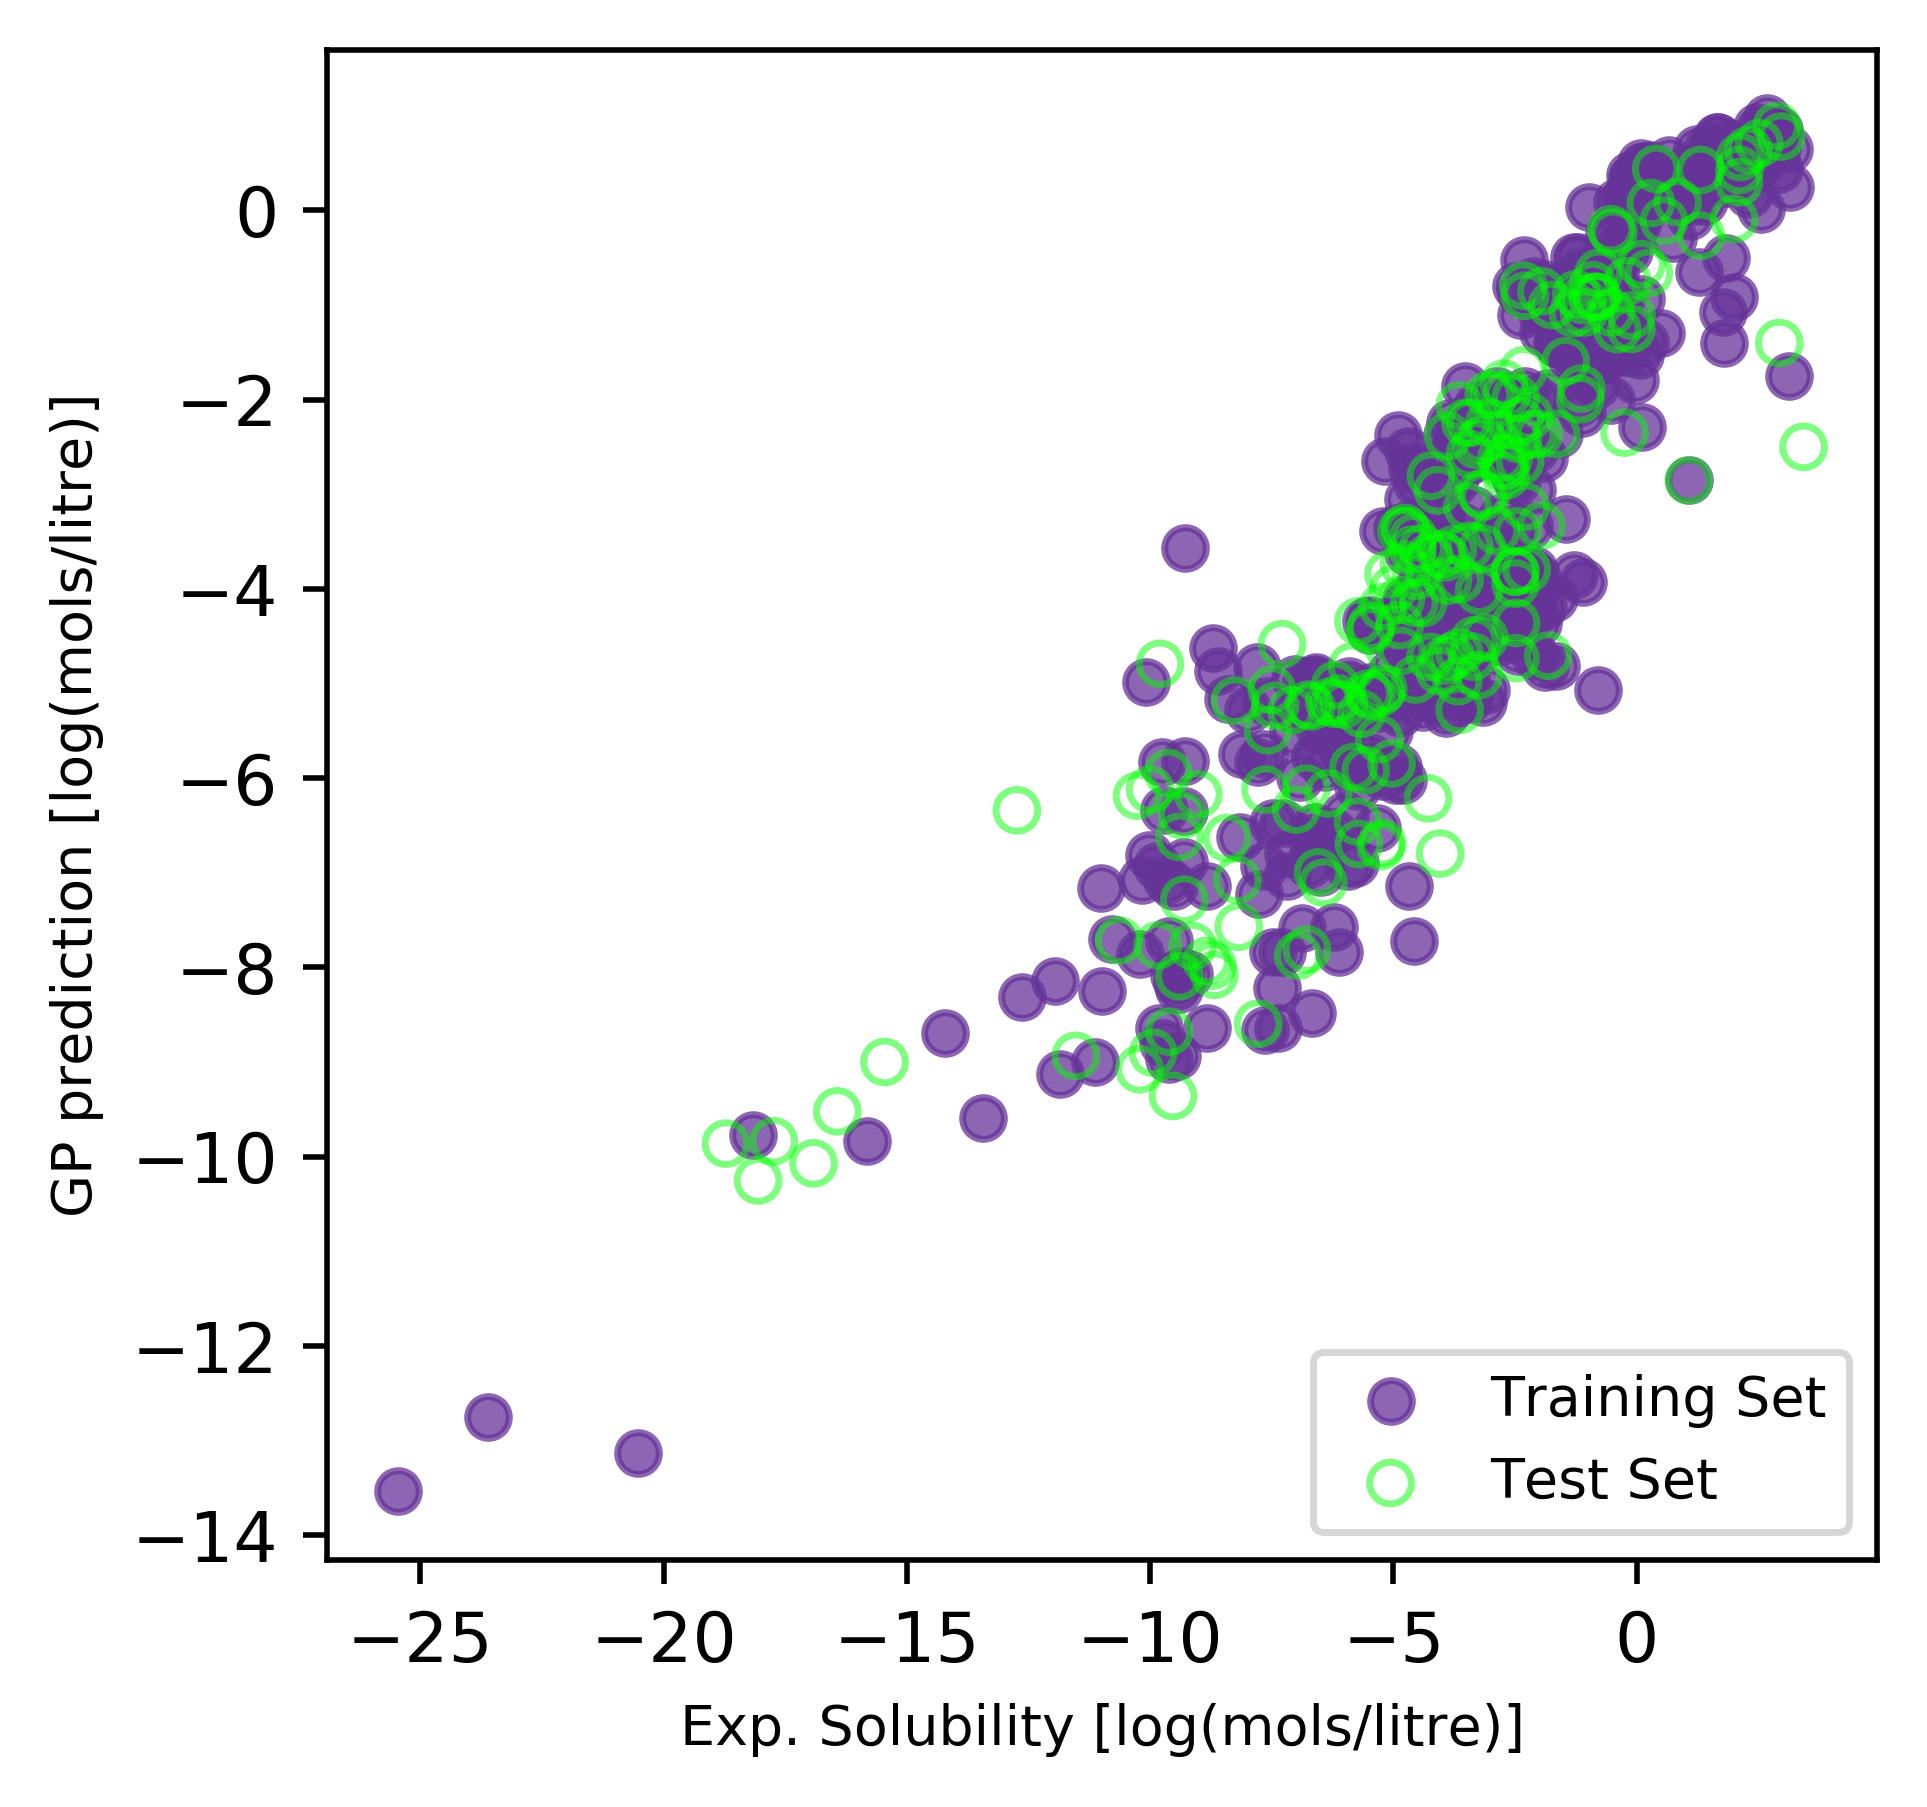

In [12]:
# fig=plt.figure(num=None,figsize=(4,4),dpi=500,facecolor='w',edgecolor='k')
# plt.xlabel('Exp. Solubility [log(mols/litre)]',fontsize=8)
# plt.ylabel('GP prediction [log(mols/litre)]',fontsize=8)
# plt.scatter(train_set['expt'],TrainPred,color='rebeccapurple',alpha=0.75,label='Training Set')
# plt.scatter(test_set['expt'],TestPred,color='lime',alpha=0.5,label='Test Set',facecolors='none')
# plt.legend(fontsize=8,loc=4);

# plt.savefig('4.png');

The mean square error of the training and test sets pre-optimisation are shown below.

In [13]:
# mse_train=mean_squared_error(train_set['expt'],TrainPred)
# print("MSE (training) = ", mse_train)

# mse_test=mean_squared_error(test_set['expt'],TestPred)
# print("MSE (test) = ", mse_test)

MSE (training) =  3.100342689880931
MSE (test) =  4.062439173113857


# Optimisation By Changing Kernel

I decided to change the kernel by multiplying the rational quadratic kernel by a constant value kernel. The constant value kernel scales the rational quadratic kernel by a value specified by the constant_value parameter.

In [11]:
# k1 = kernels.RationalQuadratic(length_scale=1.0, alpha=1.0)
# k2 = kernels.ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-05, 100000.0))

# k3 = Product(k1,k2)

I used GridSearchCV to optimise the constant_value parameter and fitted the gaussian process regressor to the optimised kernel. Then, getting the error using the best score from the grid search, I plotted the optimised graph, with error bars.

In [12]:
# gp = GaussianProcessRegressor(kernel=k3 + kernels.WhiteKernel(1), normalize_y=True, n_restarts_optimizer=10)
# gs = GridSearchCV(gp,{'kernel__k1__k2__constant_value':[1e-05,1e-04,1e-03,1e-02,1e-01,1,1e01,1e02,1e03,1e04,1e05]},
#              scoring='neg_mean_squared_error',cv=5)
# expTR = np.array(train_set['expt'])
# expTE = np.array(test_set['expt'])
# gs.fit(SDTR, expTR)
# TrainPred=gs.predict(SDTR).reshape(-1,1)
# TestPred=gs.predict(SDTE).reshape(-1,1)

/opt/anaconda/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00014597, -0.00049938,  0.00090915, -0.00052198]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 63, 'nit': 14, 'warnflag': 2}
  ConvergenceWarning)


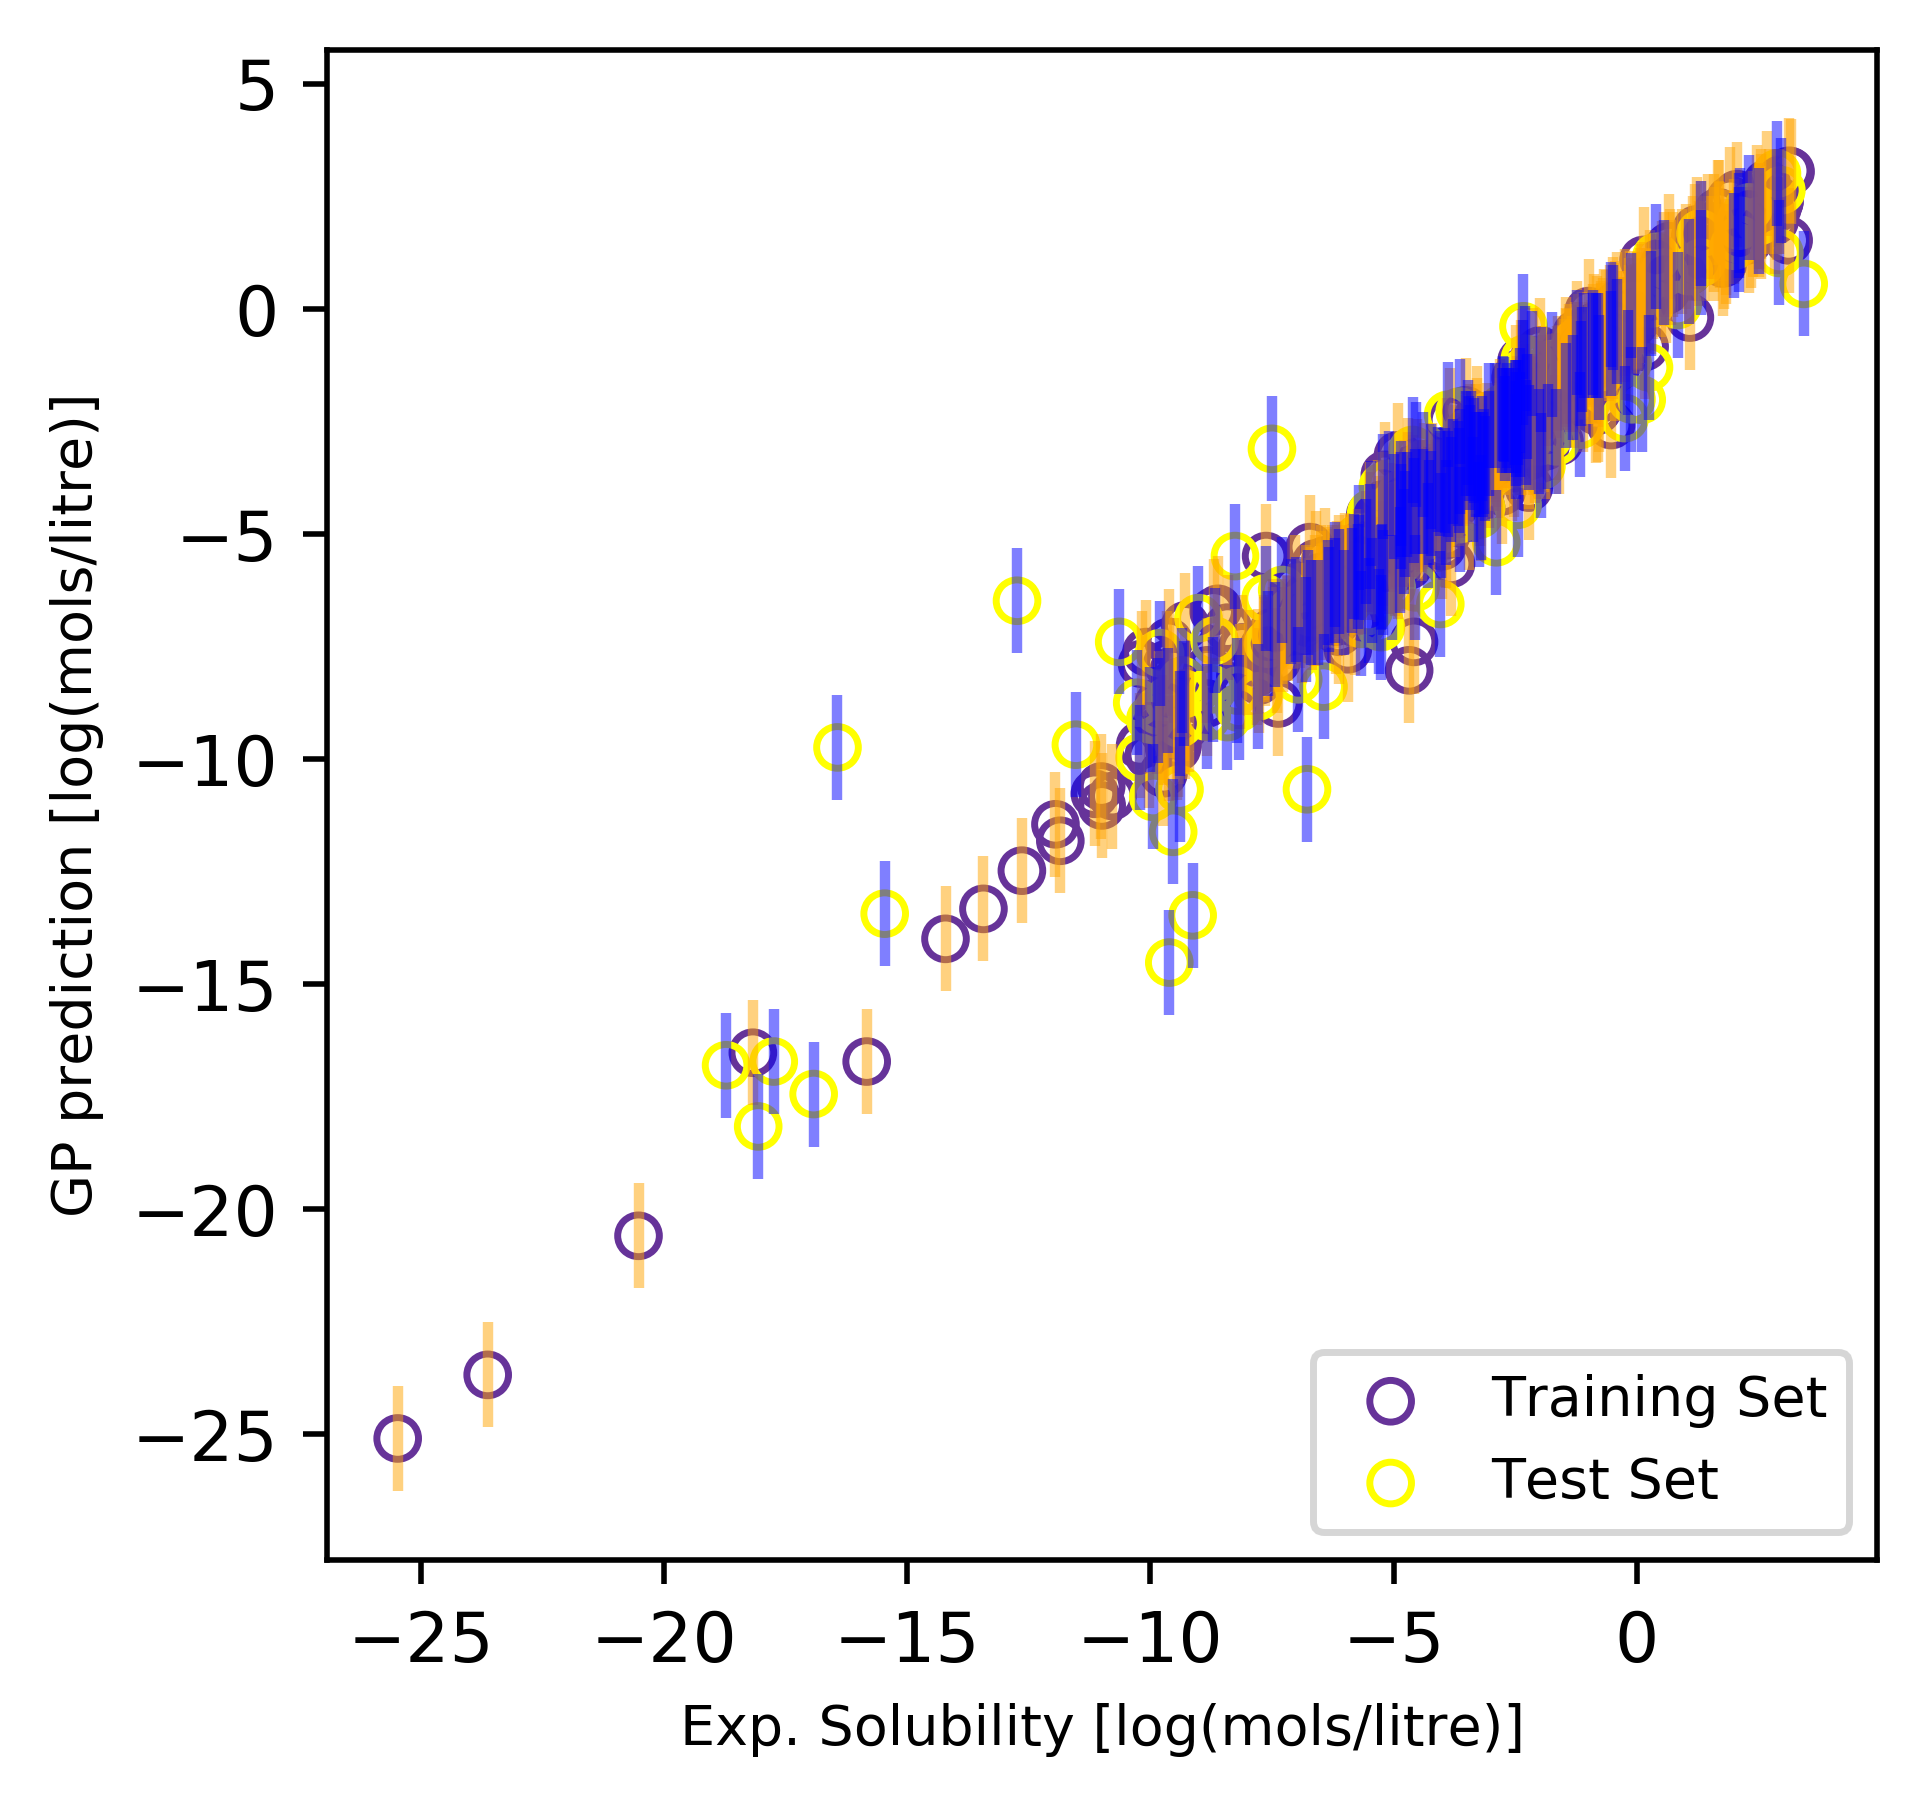

In [13]:
# yerr = math.sqrt(abs(gs.best_score_))

# fig=plt.figure(num=None,figsize=(4,4),dpi=500,facecolor='w',edgecolor='k')
# plt.xlabel('Exp. Solubility [log(mols/litre)]',fontsize=8)
# plt.ylabel('GP prediction [log(mols/litre)]',fontsize=8)
# plt.scatter(train_set['expt'],TrainPred,color='rebeccapurple',label='Training Set',facecolors='None')
# plt.scatter(test_set['expt'],TestPred,color='yellow',label='Test Set',facecolors='none')
# plt.legend(fontsize=8,loc=4);
# plt.errorbar(train_set['expt'], TrainPred, yerr=yerr, ls = 'None',ecolor='orange', alpha = 0.5)
# plt.errorbar(test_set['expt'], TestPred, yerr=yerr,  ls = 'None',ecolor='blue', alpha = 0.5)
# plt.savefig('Optimised_Plot.png');

The MSE's and Pearson's Coefficient relative to the new predictions are shown here:

In [17]:
# mse_train=mean_squared_error(train_set['expt'],TrainPred)
# print("MSE (training) = ", mse_train)

# mse_test=mean_squared_error(test_set['expt'],TestPred)
# print("MSE (test) = ", mse_test)

MSE (training) =  0.40168135234948754
MSE (test) =  1.7180507075103586


In [20]:
# pearsonr(expTR.flatten(),TrainPred.flatten())

(0.9859363282418958, 0.0)

In [19]:
# pearsonr(expTE.flatten(),TestPred.flatten())

(0.9427544726136035, 4.94772300887632e-93)